In [947]:
#ZIYAN CHEN

In [948]:
#import pandas
%pip install pandas
import pandas as pd 
print(pd)

Note: you may need to restart the kernel to use updated packages.
<module 'pandas' from '/opt/anaconda3/lib/python3.12/site-packages/pandas/__init__.py'>


In [949]:
# This section is imported from the UCI Machine Learning Repository
%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset, the id = 856 means the dataset being fetched has the ID 856
higher_education_students_performance_evaluation = fetch_ucirepo(id=856) 
  
# Features & Targets
# Features [independent variables] are the input variables that the model will use to make predictions.
X = higher_education_students_performance_evaluation.data.features  #data.features = extracting the features from the fetched dataset to variable x
# Target (or label) [dependent variable] is you are trying to predict 
y = higher_education_students_performance_evaluation.data.targets #data.targets = extracting the target values into the variable y
  
# Metadata = additional information such as its description, source, number of samples, and data types.
print(higher_education_students_performance_evaluation.metadata) 
  
# Variable information = detailed information about the Features & Target
# It can give you the names, types (eg. numerical, categorical), and descriptions, to understanding the meaning of each feature and target in the dataset.
variables_df = higher_education_students_performance_evaluation.variables
display(variables_df)
# Use pandas DataFrame like variables_df to produce a clean DataFrame for better visualization 

Note: you may need to restart the kernel to use updated packages.
{'uci_id': 856, 'name': 'Higher Education Students Performance Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/856/higher+education+students+performance+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/856/data.csv', 'abstract': "The data was collected from the Faculty of Engineering and Faculty of Educational Sciences students in 2019. The purpose is to predict students' end-of-term performances using ML techniques.", 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 145, 'num_features': 31, 'feature_types': ['Integer'], 'demographics': ['Age', 'Sex', 'Education Level', 'Marital Status', 'Income', 'Occupation'], 'target_col': ['OUTPUT Grade'], 'index_col': ['Student ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Thu Mar 07 2024', 'dataset_doi': '10.24432/C

,name,role,type,demographic,description,units,missing_values
0,Student Age,Feature,Categorical,Age,"1: 18-21, 2: 22-25, 3: above 26",None,no
1,Sex,Feature,Binary,Sex,"1: female, 2: male",None,no
2,Graduated high-school type,Feature,Categorical,Education Level,"1: private, 2: state, 3: other",None,no
3,Scholarship type,Feature,Categorical,None,"1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full",None,no
4,Additional work,Feature,Binary,None,"1: Yes, 2: No",None,no
5,Regular artistic or sports activity,Feature,Binary,None,"1: Yes, 2: No",None,no
6,Do you have a partner,Feature,Binary,Marital Status,"1: Yes, 2: No",None,no
7,Total salary if available,Feature,Categorical,Income,"1: USD 135-200, 2: USD 201-270, 3: USD 271-340...",None,no
8,Transportation to the university,Feature,Categorical,None,"1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other",None,no
9,Accomodation type in Cyprus,Feature,Categorical,None,"1: rental, 2: dormitory, 3: with family, 4: Other",None,no


In [950]:
#DATA CLEANING  -- LEVEL 1

# My dataFrame was being broken into multiple lines because the default display settings in pandas try to fit the data within a specific display width
# so i have to reset thepandas display options, to make the output more readable
pd.set_option('display.max_columns', None)   # Ensures that all columns are shown (None means no limit)
pd.set_option('display.expand_frame_repr', False)  # Prevents DataFrame columns from being wrapped onto new lines
pd.set_option('display.width', 100)  # Set the width to a large enough value to fit all columns on one line

# Preview the first 5 rows, but all the columns in the row are in a line, instead of multiple.
print(X.head()) 
print()#empty line

# Inspect the columns before cleaning
print("Uncleaned Data Features and Target:")
# Iterate through each column name and print it, 
# use enumerate so that each column name is with an index number
for i, column in enumerate(X.columns, 1):
    #Iterate over the list of columns (X.columns) starting from 1 (as we want to print from counter 1 -> first item)
    print(f"{i}. {column}")


# The the dataset checked missing_values for us (but we have to double check for missing values that we need to clean)
X.isnull().sum()
# Remove rows with missing values
X = X.dropna()

# Remove duplicate rows
X= X.drop_duplicates()

# Dropping columns that aren't related to my focus question
columns_to_drop = ['Course ID'] # all unnecessary columns here
X_cleaned = X.drop(columns=columns_to_drop) # drop them

# Print cleaned dataset
print() # Empty line
print("Cleaned Data Features and Target:")
for i, column in enumerate(X_cleaned.columns, 1):
    print(f"{i}. {column}")

print()
# Check any remaining missing values after cleaning:
for i, column in enumerate(X_cleaned.columns, 1):
    missing_count = X_cleaned[column].isnull().sum()  # Get the number of missing values for each column
    print(f"{i}. {column}: {missing_count}")

   Student Age  Sex  Graduated high-school type  Scholarship type  Additional work  Regular artistic or sports activity  Do you have a partner  Total salary if available  Transportation to the university  Accomodation type in Cyprus  Mother's education  Father's education  Number of sisters/brothers (if available)  Parental status  Mother's occupation  Father's occupation  Weekly study hours  Reading frequency (non-scientific books/journals)  Reading frequency (scientific books/journals)  Attendance to the seminars/conferences related to the department  Impact of your projects/activities on your success  Attendance to classes  Preparation to midterm exams 1  Preparation to midterm exams 2  Taking notes in classes  Listening in classes  Discussion improves my interest and success in the course  Flip-classroom  Cumulative grade point average in the last semester (/4.00)  Expected Cumulative grade point average in the graduation (/4.00)  Course ID
0            2    2                      

In [951]:
#MACHINE LEARNING ALORITHM  -- LEVEL 2 & LEVEL 3 of MATRICS
# Split the dataset into training set (feed the machine) and testing set (assess how well the model generalizes to new, unseen data.)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.3, random_state=0) # The random_state parameter(should stay the same) controls the random shuffling of data before splitting.

In [952]:
# We are starting with decision tree and testing it out
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report  #showing metrics

# Initialize and fit the model
clf = DecisionTreeClassifier(max_depth=5, random_state=0) 
# max_depth = 5 limits the depth of the decision tree to 5 balancing complexity (not underfitting) and generalization (not overfitting) 
# find the optimal depth to get the best accuracy

clf.fit(X_train, y_train)#trains (or “fits”) the decision tree

print(clf.feature_importances_) 
#provides an array of feature importance values for each feature in your dataset.
#it indicates how much each feature contributes to the decision tree’s splits in predicting the target variable. 
#The higher the value, the more important the feature is to the model. They values are normalized so that they sum to 1.
print()

# Uses the trained decision tree model to make predictions on the test data (X_test).
y_pred = clf.predict(X_test)
# y_pred -> predicted labels (outputs) for the test data. 
# These predictions will be compared to the actual labels (y_test) to evaluate the model’s performance.

# Evaluate the model through generating a detailed classification report showing key performance metrics 
print(classification_report(y_test, y_pred))
#Accuracy vs. Precision:
#accuracy is the ratio of correct predictions (both true positives and true negatives) to the total number of predictions made.
#Precision focuses on the model’s performance in terms of positive predictions
    #I have low precisions, and precision of 0.00 means the model did not correctly predict any instances of that class.

print()
from sklearn.metrics import confusion_matrix
#generates the confusion matrix by comparing the true labels (y_test) to the predicted labels (y_pred).
print(confusion_matrix(y_test, y_pred)) 
#summary of prediction outcomes -> showing the count of true positives, true negatives, false positives, and false negatives for each class.


[0.05809739 0.         0.10393256 0.09209381 0.         0.1109272
 0.         0.         0.02973793 0.         0.08887999 0.05507024
 0.         0.         0.03717241 0.0356705  0.         0.
 0.         0.         0.         0.03854917 0.         0.
 0.         0.05231673 0.         0.11503895 0.14947098 0.03304214]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.38      0.69      0.49        13
           2       0.20      0.14      0.17         7
           3       0.33      0.17      0.22         6
           4       0.00      0.00      0.00         2
           5       0.67      0.40      0.50         5
           6       0.00      0.00      0.00         4
           7       0.40      0.50      0.44         4

    accuracy                           0.34        44
   macro avg       0.25      0.24      0.23        44
weighted avg       0.30      0.34      0.30        44


[[0 3 0 0 0 0 0 0]
 [0 9 1 0

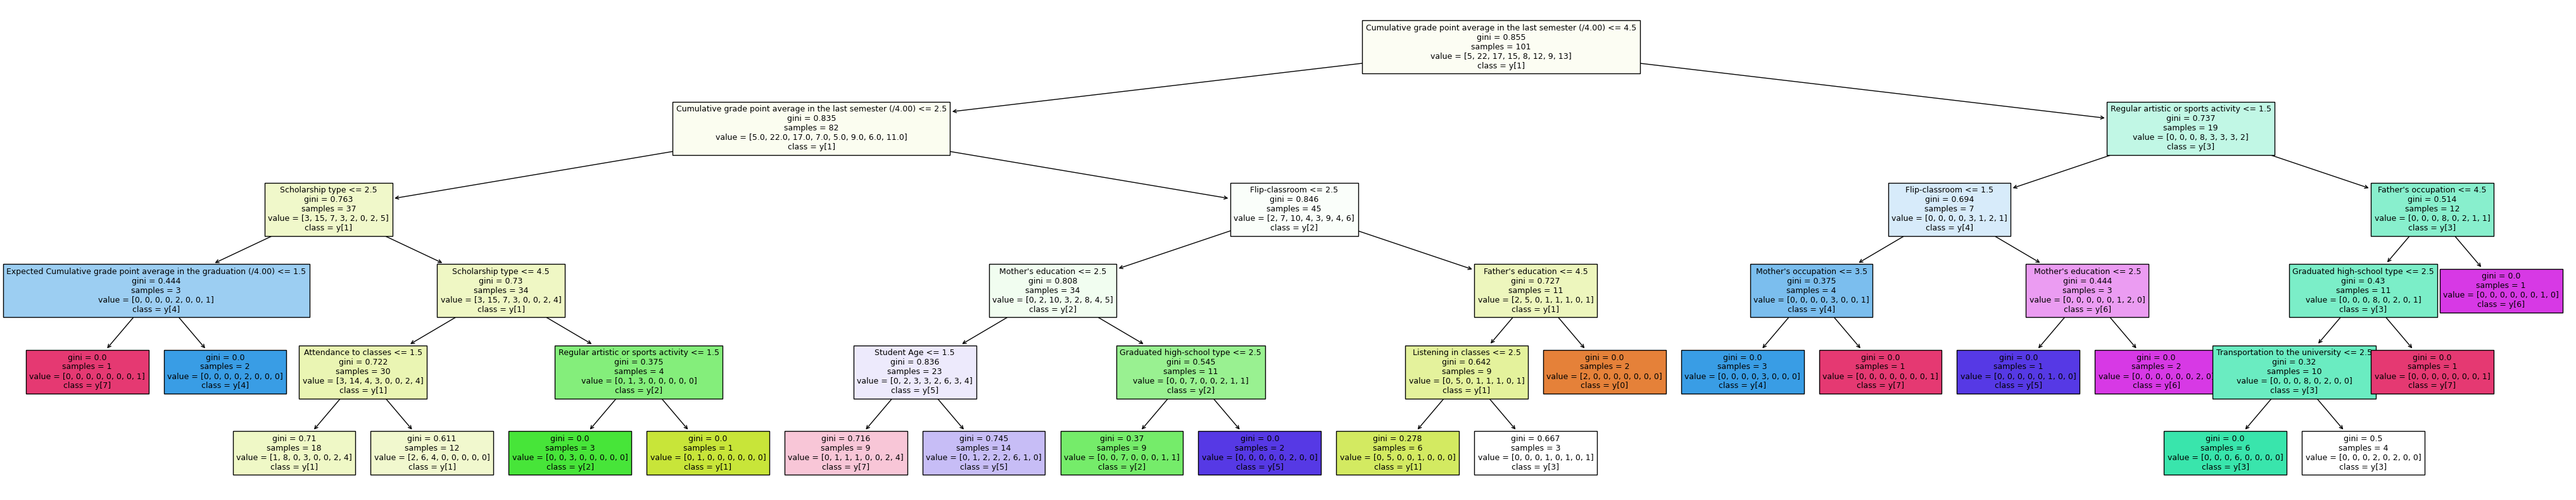

In [954]:
#visualize the decision tree 

from sklearn import tree #contains functions for working with decision trees, such as plot_tree() function to visualize the tree.
import matplotlib.pyplot as plt

#set the size of the tree, figsize = (width, length)
plt.figure(figsize=(52,10))  
#there are still some overlaps in the graph, but I tried different values of the width and length to reduce it as much as possible.

tree.plot_tree(clf, filled=True, feature_names=X_cleaned.columns, class_names=True, fontsize=9) 
#filled = True-> the method uses color to indicate the majority of the class, and the class_name will be played when it is set to True
# I also tried to adjust the fontsize to reduce the overlaps.
# clf -> This is the trained decision tree classifier
plt.show()

In [955]:
#why decision trees?
#The nature of the Target (Grades) are categorical (e.g., AA, BB, CC, Fail) -> a classification task.
#I can do regression if I convert grades into numerical values (e.g., 0, 1, 2,... for ordinal grades), that’s not ideal because grades are not continuous.
#Decision tree leaves more room for interpretation, as you can understand how the model makes decisions based on different features.
#it shows the top most as the most important factors, and there can so many factors  

In [956]:
#random forest -> an ensemble of decison tree
#it ranks feature importance and solves the overfitting problem
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=45, random_state=0) #playing with the estimators, the accuracy changes
# Train the model
rf_clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=45, random_state=0)

In [957]:
y_pred = rf_clf.predict(X_test)

In [958]:
from sklearn.metrics import classification_report

# Generate a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.40      0.62      0.48        13
           2       0.20      0.14      0.17         7
           3       0.29      0.33      0.31         6
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       0.33      0.25      0.29         4
           7       0.33      0.25      0.29         4

    accuracy                           0.30        44
   macro avg       0.19      0.20      0.19        44
weighted avg       0.25      0.30      0.26        44



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


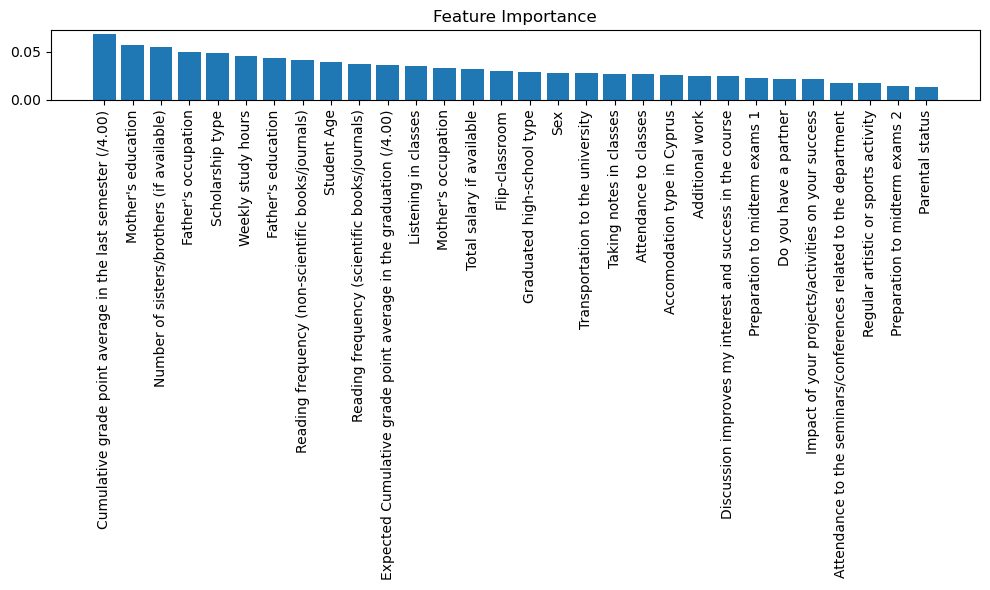

In [959]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
#np.argsort()  sorts the indices of the features in ascending order based on their importance scores
#[::-1] we reverse the features in ascending order to get the indices in descending order (from most important to least important).

# Plot feature importance
plt.figure(figsize=(10, 6)) #size (width, tall)
plt.title("Feature Importance") 
plt.bar(range(X_cleaned.shape[1]), importances[indices], align="center")
#This bar function creates a bar chart.
#X_cleaned.shape[1] gives the number of features in X_cleaned
#range() generates a sequence of integers from 0 to n-1
#n is the number of features. represent the x-axis positions for each bar.
#the importances [indices] ensures that the most important features are plotted first.

plt.xticks(range(X_cleaned.shape[1]), X_cleaned.columns[indices], rotation=90)
#plt.xticks(): sets the x-axis labels for the plot.
#range(X_cleaned.shape[1]): specifies the positions on the x-axis = where the labels should appear corresponding to the feature positions
#X_cleaned.columns[indices]: retrieves the feature names from the dataset (X_cleaned) and 
#    orders them according to the indices variable (orders the features by importance) -> used as the x-axis labels.
#rotation=90: rotates the x-axis labels 90 degrees (vertical) to prevent them from overlapping.

plt.tight_layout()
#plt.tight_layout(): automatically adjusts the spacing between elements in the plot to make sure everything fits nicely without overlapping.
plt.show()